In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings("ignore")

In [37]:
census=pd.read_csv("C:/Users/yo632/OneDrive/Masaüstü/İncomeAnalysis/census.csv")
cleaned_census = pd.read_csv("C:/Users/yo632/OneDrive/Masaüstü/İncomeAnalysis/census.csv")
train=pd.read_csv("C:/Users/yo632/OneDrive/Masaüstü/İncomeAnalysis/train.csv")
test=pd.read_csv("C:/Users/yo632/OneDrive/Masaüstü/İncomeAnalysis/test.csv")

In [3]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
train.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [6]:
print(census.shape)
print(train.shape)
print(test.shape)

(48842, 15)
(32561, 15)
(16281, 15)


In [7]:
print(train.shape[0]+test.shape[0])
print(test.shape[0]/census.shape[0])

48842
0.33334015806068545


# Census data EDA

In [12]:
census['income_above_50K']=census['income'].map({'<=50K':0, '>50K':1})


In [13]:
census.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_above_50k,income_above_50K
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,NaN,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,NaN,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,1.0,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,1.0,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,NaN,0


In [14]:
def plot(column):
    if census[column].dtype != 'int64':
        f, axes = plt.subplots(1,1,figsize=(15,5))
        sns.countplot(x=column, hue='income_above_50K', data = census)
        plt.xticks(rotation=90)
        plt.suptitle(column,fontsize=20)
        plt.show()
    else:
        g = sns.FacetGrid(census, row="income_above_50K", margin_titles=True, aspect=4, height=3)
        g.map(plt.hist,column,bins=100)
        plt.show()
    plt.show()

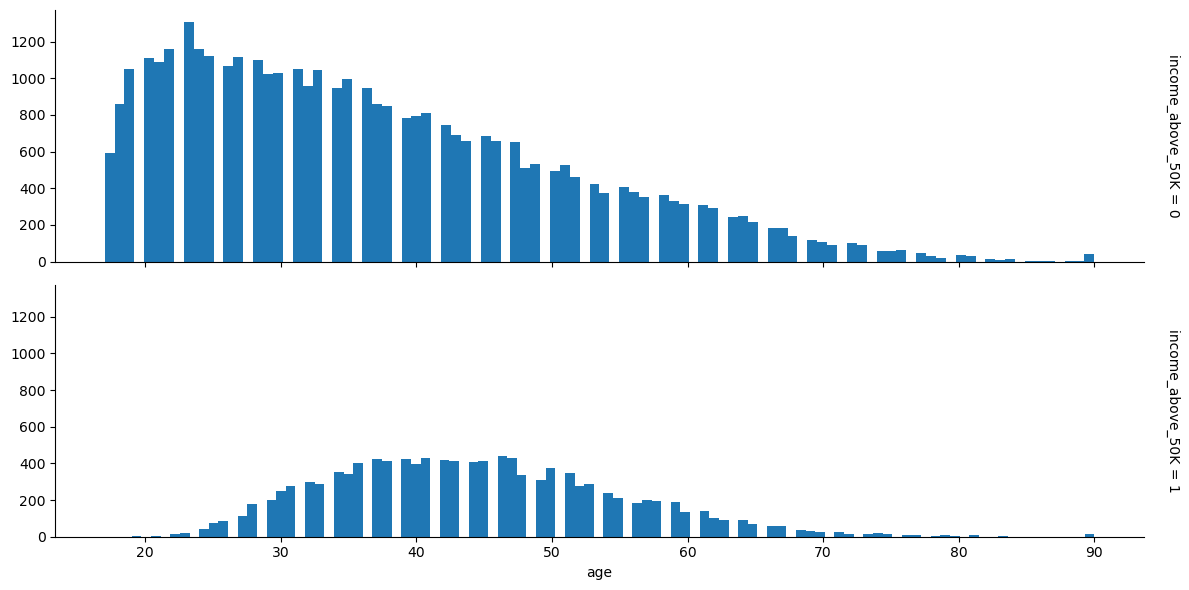

In [15]:
plot('age')


Tablo beklenildiği gibi dağılım gösteriyor, 50 bin doların üzerinde kazananların çoğunluğu normal bir dağılım gösterirken,
erken yaşlarda çoğunlukla 50 bin doların altında kazananlar bulunuyor. Eğitim seviyelerine bakmak da bunu desteklemelidir
çünkü daha yüksek eğitim seviyelerine sahip olanlar daha geç yaşlarda tam zamanlı işe başlayabilirler, ancak daha yüksek bir
maaş alabilirler.

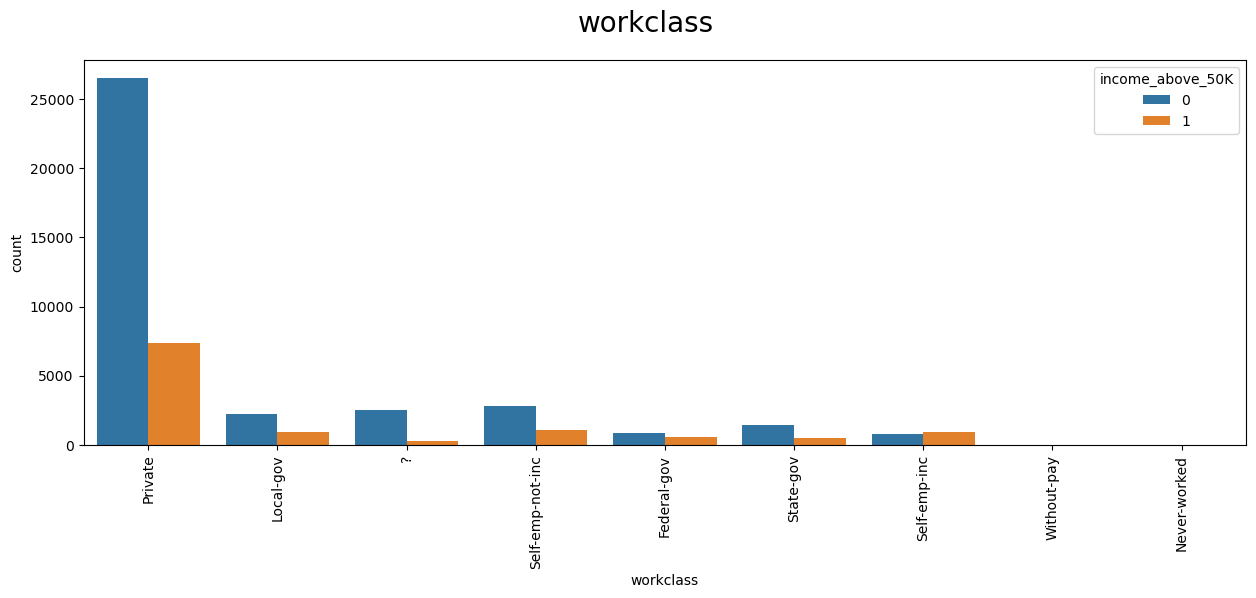

In [16]:
plot("workclass")

Final modelde sütunu kullanmayı düşünmüyorum, ancak modeli etkileyip etkilemediğini test edeceğim. Veri temizleme amaçlı olarak 
Private sütununu tutmaya devam edeceğim ve geri kalanları Diğer (Others) olarak dönüştüreceğim.

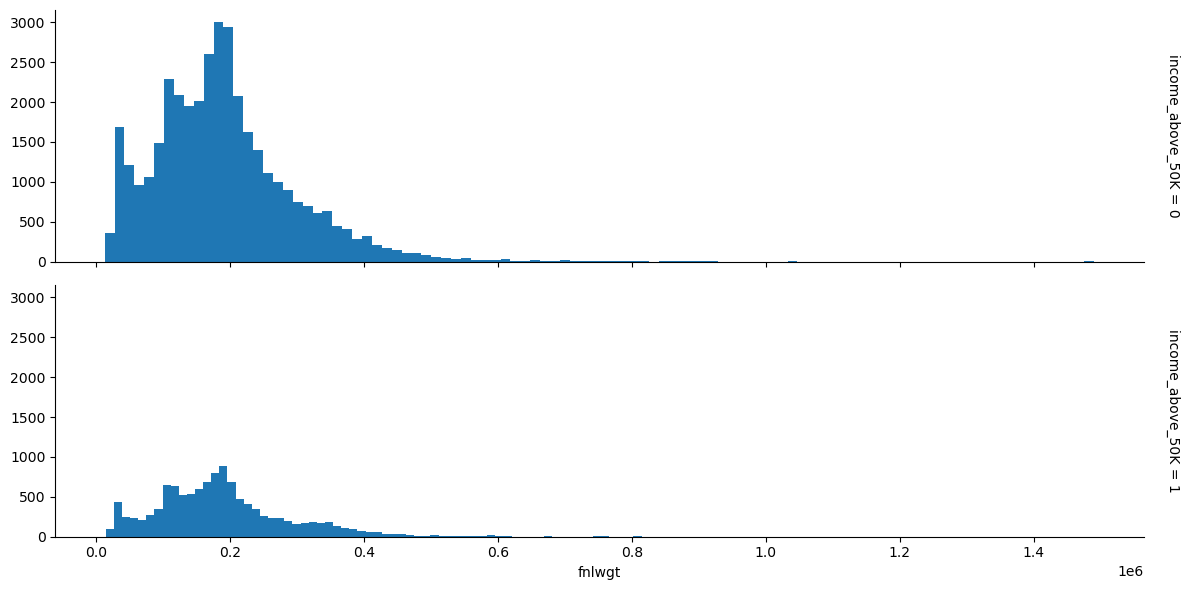

In [17]:
plot('fnlwgt')

Yukarıdaki çizimi nasıl yorumlayacağımdan emin değilim, a
ncak olduğu gibi bırakacağım.





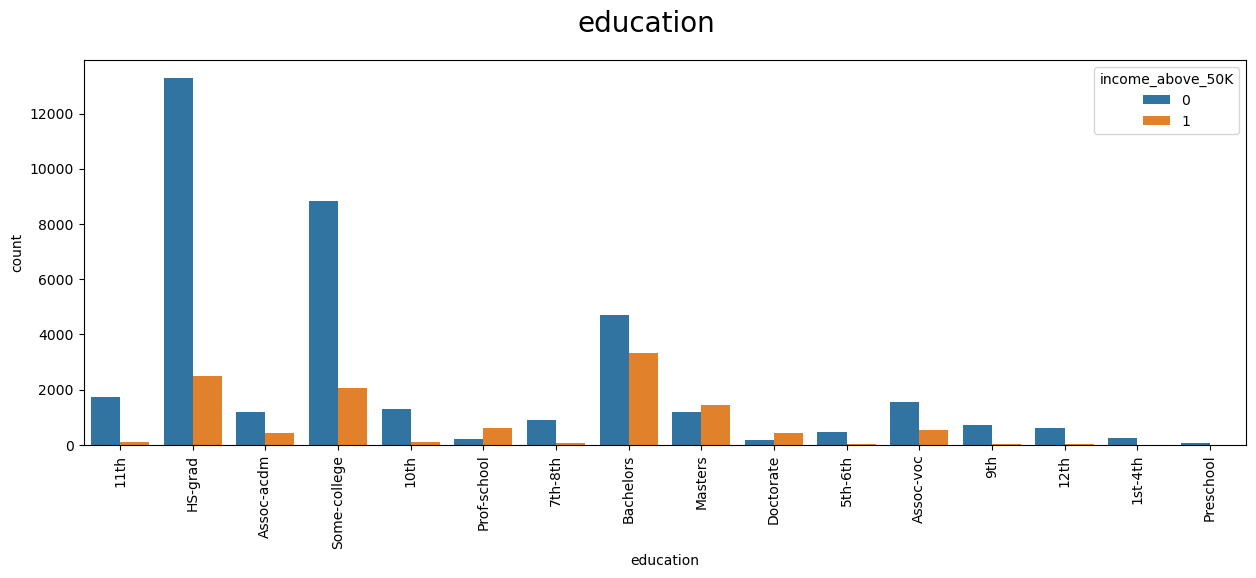

In [18]:
plot('education')


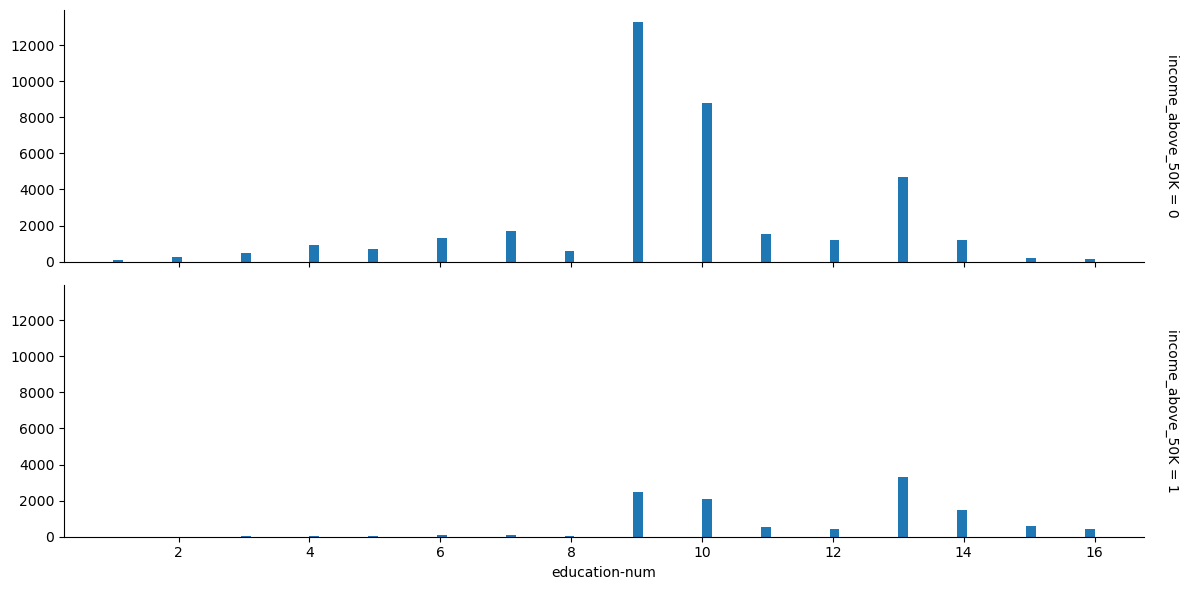

In [19]:
plot('education-num')


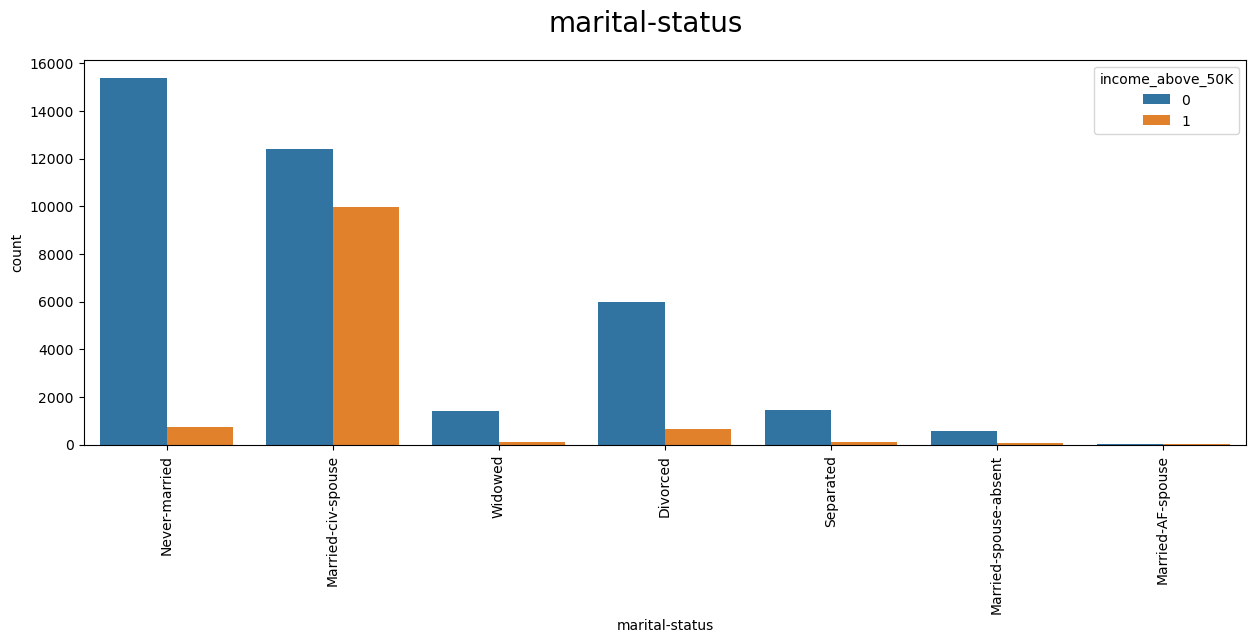

In [20]:
plot('marital-status')


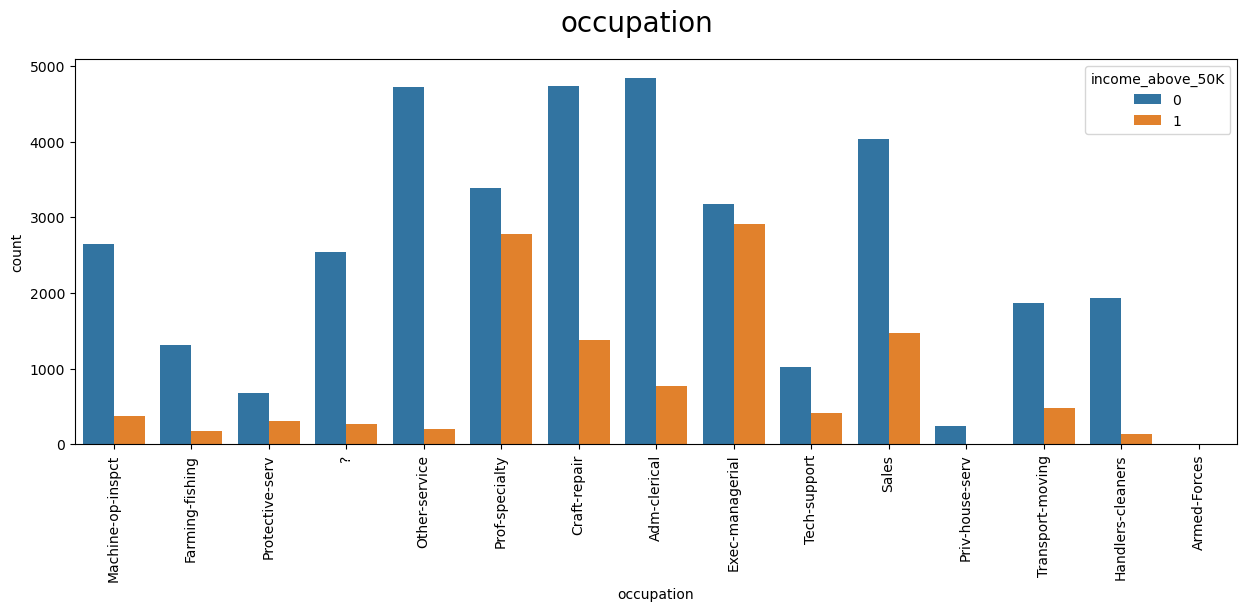

In [21]:
plot('occupation')


In [22]:
over_50k_count_by_occ=pd.DataFrame(census[census['income_above_50K']==1]['occupation'].value_counts())
count_by_occ=pd.DataFrame(census['occupation'].value_counts())
merged=pd.merge(over_50k_count_by_occ,count_by_occ,left_index=True,right_index=True)
merged.rename(columns={'occupation_x':'income_over_50K','occupation_y':'Total pop'}, inplace=True)
merged['percent_of_above_50K']=merged['income_over_50K']/(merged['Total pop'])
merged=merged.sort_values(by='percent_of_above_50K',axis=0,ascending=False)
merged

,income_over_50K,Total pop,percent_of_above_50K
Exec-managerial,2908,6086,0.477818
Prof-specialty,2784,6172,0.451069
Armed-Forces,5,15,0.333333
Protective-serv,308,983,0.313327
Tech-support,420,1446,0.290456
Sales,1475,5504,0.267987
Craft-repair,1383,6112,0.226276
Transport-moving,481,2355,0.204246
Adm-clerical,768,5611,0.136874
Machine-op-inspct,372,3022,0.123097


In [23]:
# Bunu 3 bölüme ayırmaya karar verdim:

# Tümü %30'un üzerinde olanlar level_3_occ olarak gruplanacak
# %20 ile %30 arasındakiler level_2_occ olarak gruplanacak
# %20'nin altındakiler level_1_occ olarak gruplanacak.

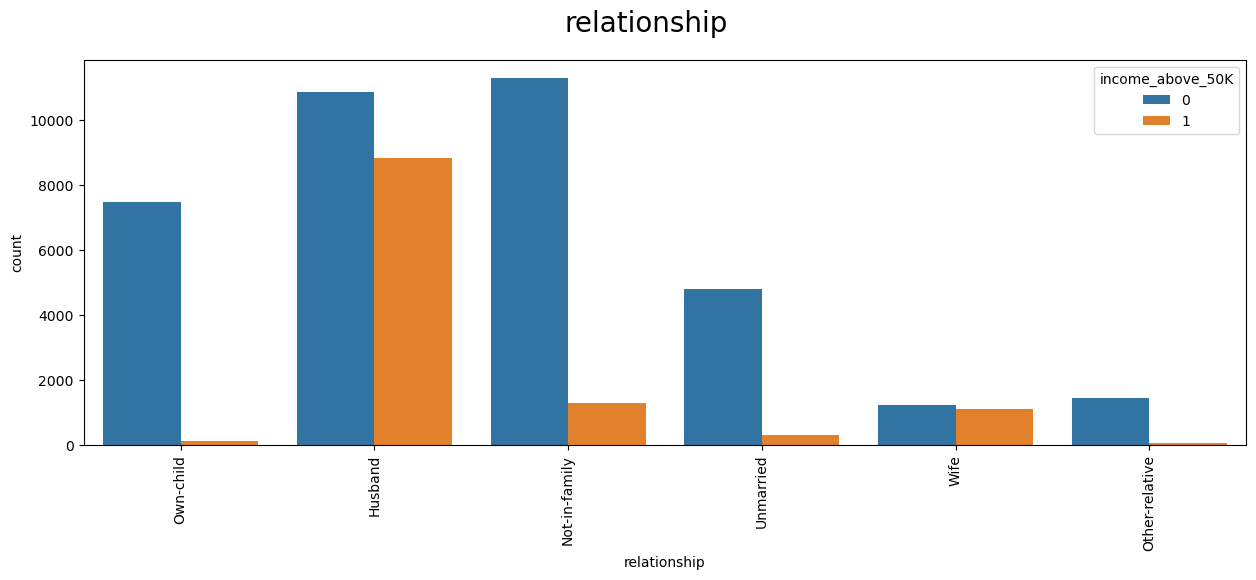

In [24]:
plot('relationship')


Bu sütun, medeni durum bilgisiyle aynı bilgiyi veriyor gibi görünüyor. İlk modelim için bu sütunu çıkaracağım. 
Belki de test çalışmaları için bu sütunu eklemeyi veya medeni durumla değiştirmeyi deneyebilirim 
ve nasıl etkilediğini görebilirim.

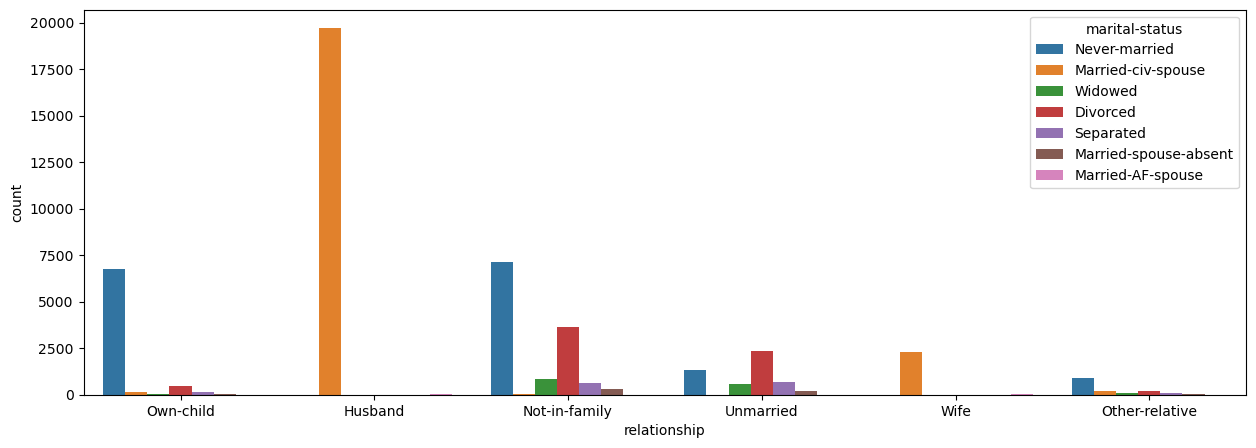

In [25]:
f, axes = plt.subplots(1,1,figsize=(15,5))
sns.countplot(data=census,x='relationship',hue='marital-status')
plt.show()

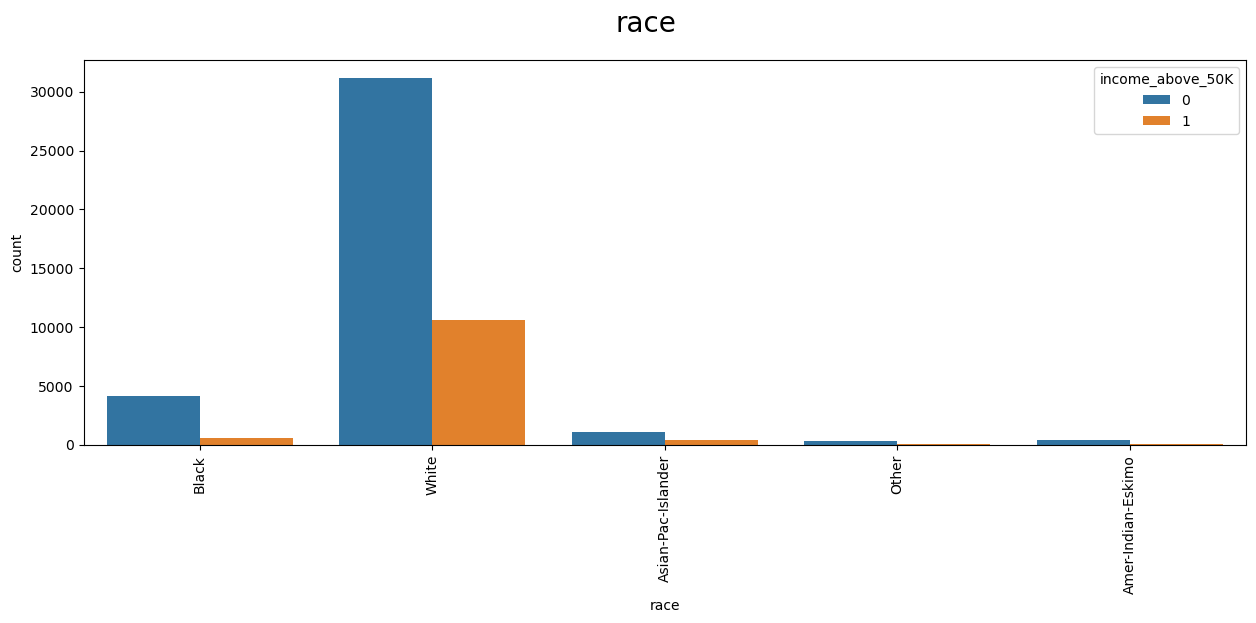

In [26]:
plot('race')


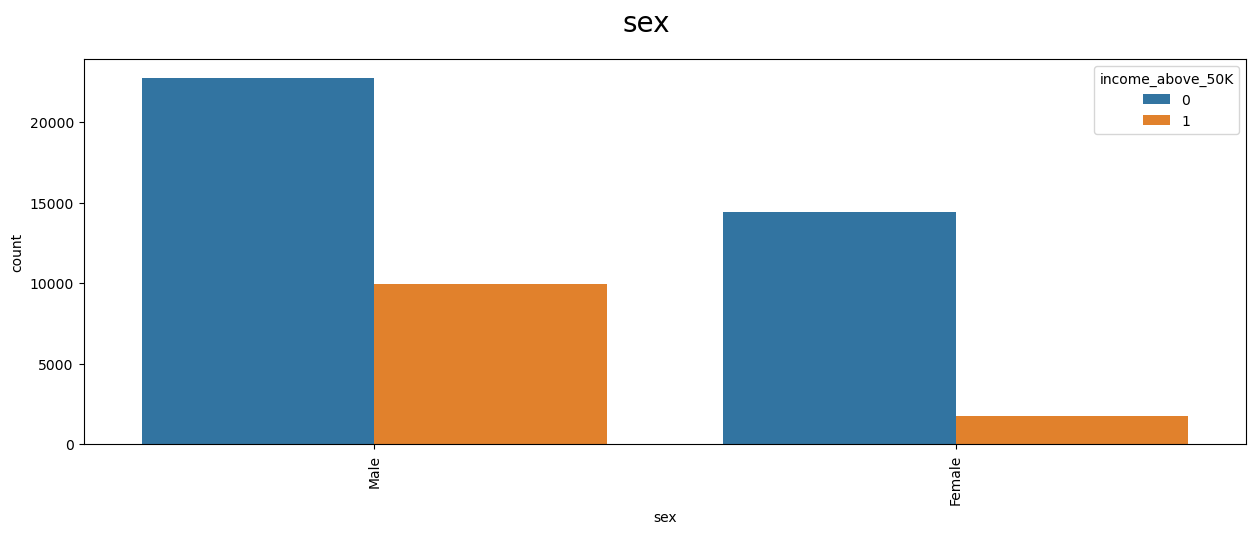

In [27]:
plot('sex')


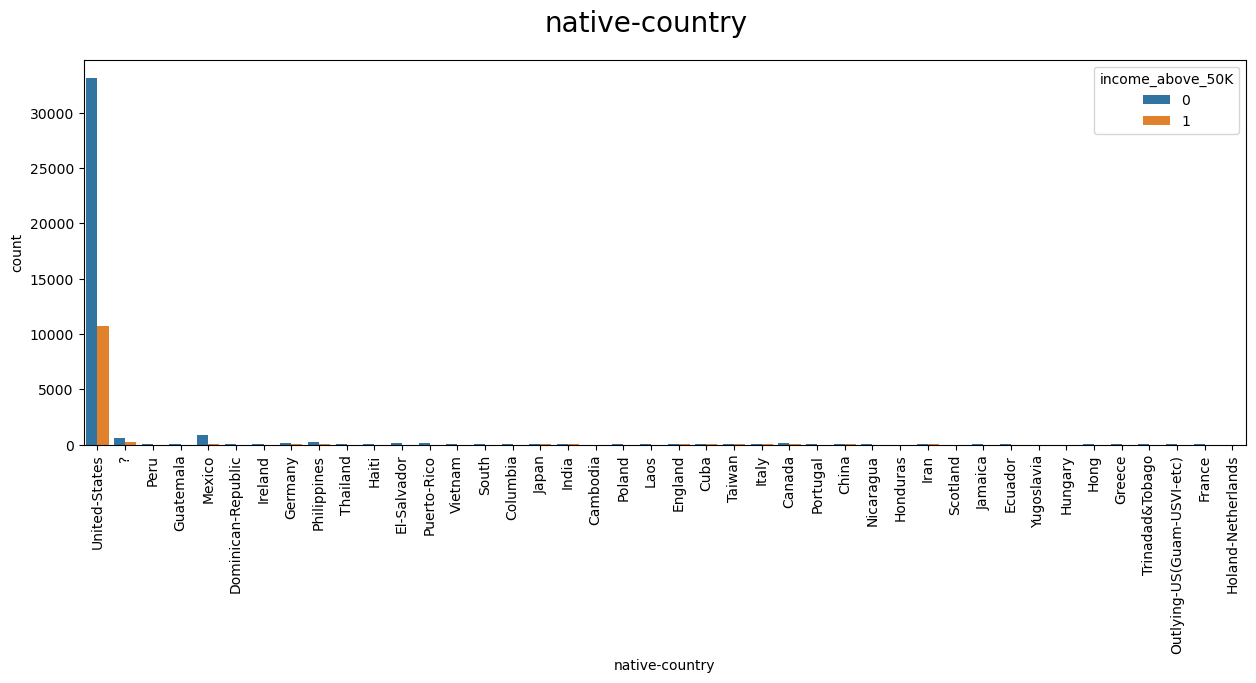

In [28]:
plot('native-country')


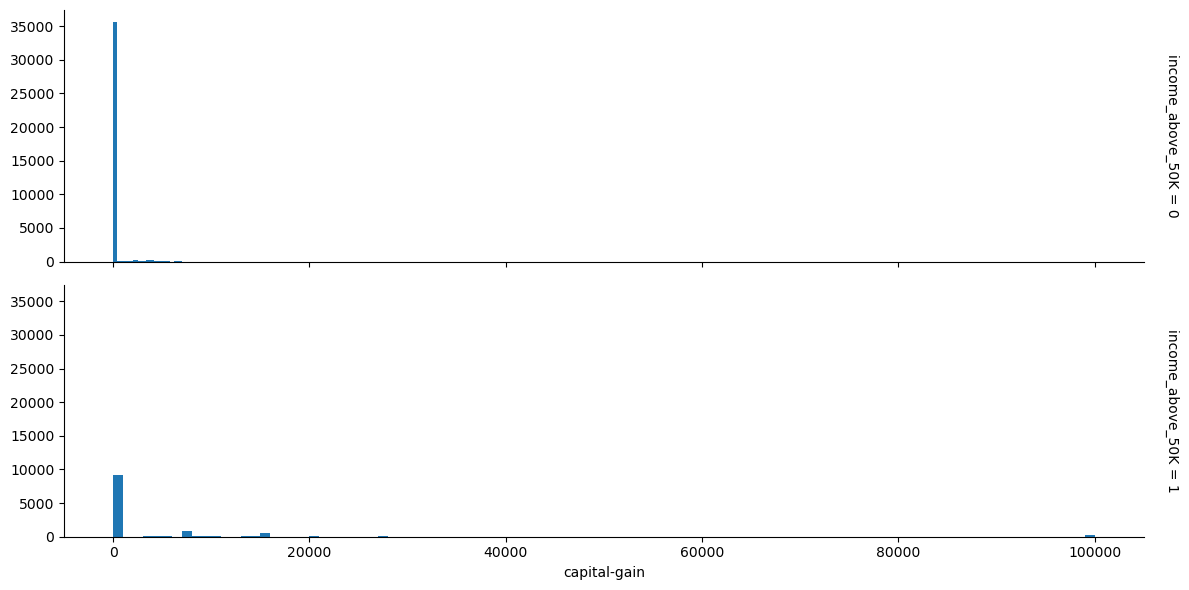

In [29]:
plot('capital-gain')


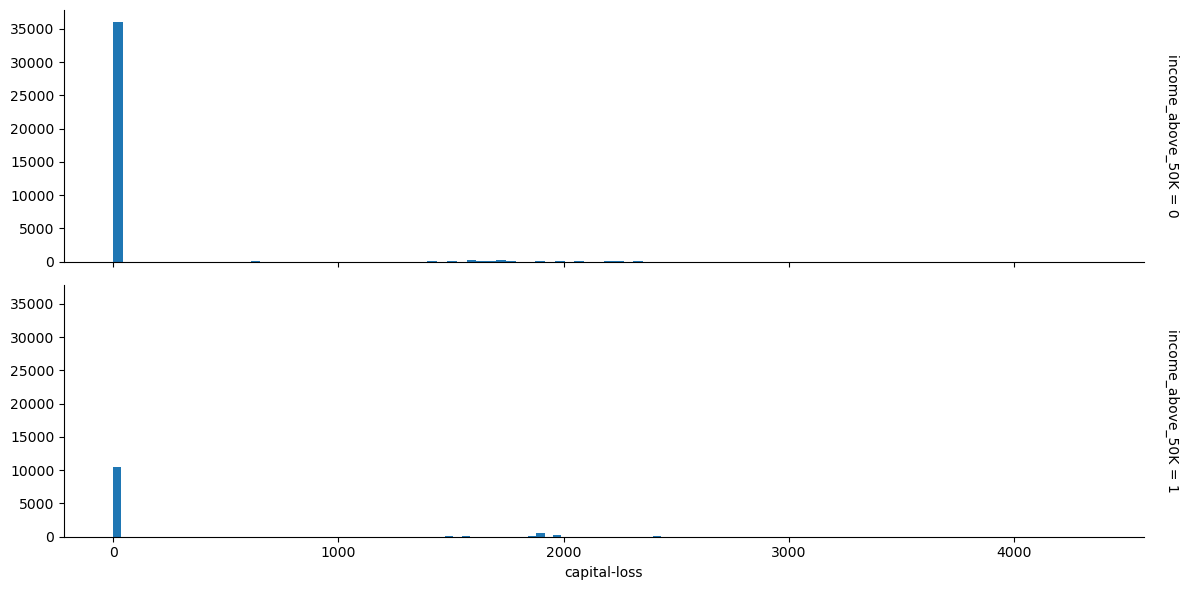

In [30]:
plot('capital-loss')


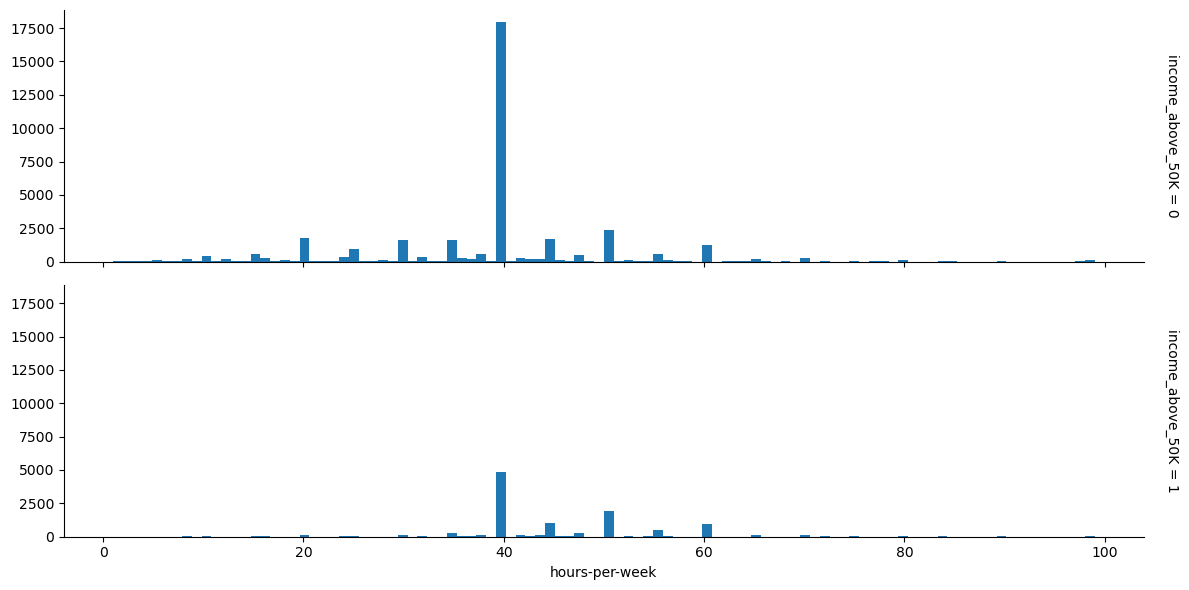

In [31]:
plot('hours-per-week')


# Data cleaning function


In [34]:
def data_cleaner(data):
    data['is_female']=data['sex'].map({'Male':0, 'Female':1})
    
    data['is_private']=data['workclass'].map({'Private':1})
    
    data['is_private'].fillna(0, inplace=True)
    
    data['education'] = data['education'].map(
        {'Preschool':'level_1_ed','1st-4th':'level_1_ed','5th-6th':'level_1_ed','7th-8th':'level_1_ed','9th':'level_1_ed','10th':'level_1_ed','11th':'level_1_ed','12th':'level_1_ed','HS-grad':'level_1_ed',
        'Prof-school':'level_2_ed','Assoc-acdm':'level_2_ed','Assoc-voc':'level_2_ed','Some-college':'level_2_ed',
        'Bachelors':'level_3_ed','Masters':'level_3_ed','Doctorate':'level_3_ed'})
    
    data['is_couple']=data['marital-status'].map({'Married-civ-spouse':1,'Never-married':0,'Divorced':0,'Separated':0,'Widowed':0,'Married-spouse-absent':0,'Married-AF-spouse':1})
    
    occupation_level_map={
    'Exec-managerial':'level_3_occ',
    'Prof-specialty':'level_3_occ',
    'Armed-Forces':'level_3_occ',
    'Protective-serv':'level_3_occ',
    'Tech-support':'level_2_occ',
    'Sales':'level_2_occ',
    'Craft-repair':'level_2_occ',
    'Transport-moving':'level_2_occ',
    'Adm-clerical':'level_1_occ',
    'Machine-op-inspct':'level_1_occ',
    'Farming-fishing':'level_1_occ',
    '?':'level_1_occ',
    'Handlers-cleaners':'level_1_occ',
    'Other-service':'level_1_occ',
    'Priv-house-serv':'level_1_occ'}
    data['occupation']=data['occupation'].map(occupation_level_map)
    
    race_map={'Black':0, 'White':1, 'Asian-Pac-Islander':0, 'Other':0,'Amer-Indian-Eskimo':0}
    data['is_white']=data['race'].map(race_map)
    
    native_country_map=pd.DataFrame(data=census['native-country'].unique(),columns=['Country'])
    native_country_map['map']=native_country_map['Country'].apply(lambda x:1 if x=='United-States' else 0)
    native_country_map=dict(zip(native_country_map['Country'],native_country_map['map']))
    data['is_US_native']=data['native-country'].map(native_country_map)
    
    data = pd.get_dummies(data,columns =['education','occupation'], dtype = int, drop_first=True)
    
    data['income_above_50K']=data['income'].map({'<=50K':0, '>50K':1})
    
    data.drop(labels=['income','sex','workclass','marital-status','relationship','race','native-country'],axis=1,inplace=True)
    
    return data

In [38]:
data_cleaner(cleaned_census).head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,is_female,is_private,is_couple,is_white,is_US_native,education_level_2_ed,education_level_3_ed,occupation_level_2_occ,occupation_level_3_occ,income_above_50K
0,25,226802,7,0,0,40,0,1.0,0,0,1,0,0,0,0,0
1,38,89814,9,0,0,50,0,1.0,1,1,1,0,0,0,0,0
2,28,336951,12,0,0,40,0,0.0,1,1,1,1,0,0,1,1
3,44,160323,10,7688,0,40,0,1.0,1,0,1,1,0,0,0,1
4,18,103497,10,0,0,30,1,0.0,0,1,1,1,0,0,0,0


# Train and test data cleaning


In [39]:
cleaned_train=data_cleaner(train)

In [41]:
cleaned_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     32561 non-null  int64  
 1   fnlwgt                  32561 non-null  int64  
 2   education-num           32561 non-null  int64  
 3   capital-gain            32561 non-null  int64  
 4   capital-loss            32561 non-null  int64  
 5   hours-per-week          32561 non-null  int64  
 6   is_female               32561 non-null  int64  
 7   is_private              32561 non-null  float64
 8   is_couple               32561 non-null  int64  
 9   is_white                32561 non-null  int64  
 10  is_US_native            32561 non-null  int64  
 11  education_level_2_ed    32561 non-null  int32  
 12  education_level_3_ed    32561 non-null  int32  
 13  occupation_level_2_occ  32561 non-null  int32  
 14  occupation_level_3_occ  32561 non-null

In [42]:
cleaned_test=data_cleaner(test)

In [43]:
cleaned_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     16281 non-null  int64  
 1   fnlwgt                  16281 non-null  int64  
 2   education-num           16281 non-null  int64  
 3   capital-gain            16281 non-null  int64  
 4   capital-loss            16281 non-null  int64  
 5   hours-per-week          16281 non-null  int64  
 6   is_female               16281 non-null  int64  
 7   is_private              16281 non-null  float64
 8   is_couple               16281 non-null  int64  
 9   is_white                16281 non-null  int64  
 10  is_US_native            16281 non-null  int64  
 11  education_level_2_ed    16281 non-null  int32  
 12  education_level_3_ed    16281 non-null  int32  
 13  occupation_level_2_occ  16281 non-null  int32  
 14  occupation_level_3_occ  16281 non-null

# Train and test data cleaning


In [53]:
X=cleaned_train.drop(labels=['income_above_50K'],axis=1)
y=cleaned_train['income_above_50K']

test_X=cleaned_test.drop(labels=['income_above_50K'],axis=1)
test_y=cleaned_test['income_above_50K']

# Machine learning 

In [59]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('XGBClassifier', XGBClassifier()))
models.append(('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('RandomForestClassifier', RandomForestClassifier()))

results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=0)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LogisticRegression: 0.797734 (0.006484)
DecisionTreeClassifier: 0.813581 (0.006270)
XGBClassifier: 0.866804 (0.004797)
GradientBoostingClassifier: 0.865483 (0.003513)
KNeighborsClassifier: 0.775805 (0.006602)
RandomForestClassifier: 0.851202 (0.005970)


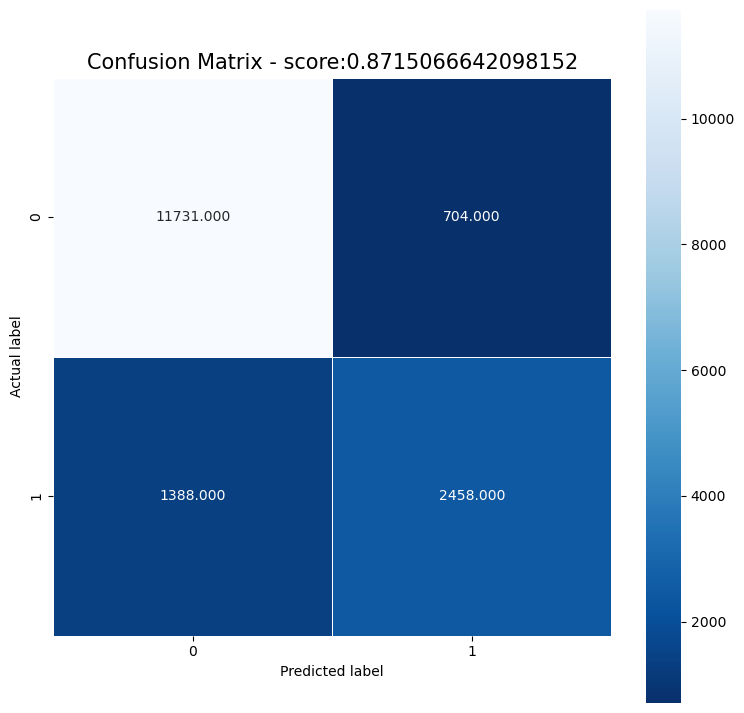

              precision    recall  f1-score   support

           0       0.89      0.94      0.92     12435
           1       0.78      0.64      0.70      3846

    accuracy                           0.87     16281
   macro avg       0.84      0.79      0.81     16281
weighted avg       0.87      0.87      0.87     16281



In [60]:
model=GradientBoostingClassifier(random_state=0,learning_rate=0.2,n_estimators=200)
model.fit(X,y)
pred_y=model.predict(test_X)

from sklearn import metrics

cm = metrics.confusion_matrix(test_y, pred_y)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Confusion Matrix - score:'+str(metrics.accuracy_score(test_y,pred_y))
plt.title(all_sample_title, size = 15);
plt.show()
print(metrics.classification_report(test_y,pred_y))